In [14]:
from keras.layers import Dense, Flatten
#model converts our layers into object with training references
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [15]:
#we are giving 224 as image size becz we would be using vgg16 where it was build on 224 image size
#if you increase the size so you need greater gpu to make it run
IMAGE_SIZE = [224, 224]


In [16]:
train_path = '/home/Train'
valid_path = '/home/Test'

In [17]:
#in input size we added 3 becz our image are rgb so 3 is the rgb channel
#for the weights we defined it as imagenet as imagenet is the database for which it has been trained
#inculde_top is false it means that the last output layer of vgg16 is removed becz we dont need it
#as we would be adding our own output layer
# add preprocessing layer to the front of VGG
vgg=VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
# don't train existing weights
#here we are defining that layer.trainable is false as we dont want to train vgg16 layers becz it is 
#already trained but if you set as true so your vgg16 model starts to train itself again and you might now get accurate results
for layer in vgg.layers:
  layer.trainable = False

In [19]:
folders = glob('/home/Train/*')
batch=32
len(folders)

3

In [20]:
#in x we flatten the output of our vgg it means we discarded the output layer previously of vgg16
#and now we are flattening it means converting it to neurons and then making another layer
#of dense and adding the units as len of folders in our case it is 2 and joining this layer with our
#flatten vgg output layer
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

In [21]:
# create a model object
#model converts our layers into object with training references
model = Model(inputs=vgg.input, outputs=prediction)

In [22]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [23]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   brightness_range=[1.0, 1.2],
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('/home/Train',
                                                 target_size = (224, 224),
                                                 batch_size = batch,
                                                 classes=['Dogs', 'Cats','Tigers'],shuffle=False,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/home/Test',
                                            target_size = (224, 224),
                                            batch_size = batch,
                                            classes=['Dogs', 'Cats','Tigers'],shuffle=False,
                                            class_mode = 'categorical')

Found 30 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [26]:
# fit the model
#steps_per_epoch is batches of samples to train. It is used to define how many batches of samples to use in one epoch
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
1/1 [==============================] - 9s 9s/step - loss: 1.3315 - accuracy: 0.2667 - val_loss: 3.2661 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 2.8278 - accuracy: 0.3333 - val_loss: 0.9784 - val_accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 0.6677 - accuracy: 0.6333 - val_loss: 1.0867 - val_accuracy: 0.5333
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.9197 - accuracy: 0.5667 - val_loss: 1.4738 - val_accuracy: 0.5333
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 1.2011 - accuracy: 0.6667 - val_loss: 1.2737 - val_accuracy: 0.5333
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 0.8474 - accuracy: 0.6667 - val_loss: 0.6427 - val_accuracy: 0.6667
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 0.3145 - accuracy: 0.8333 - val_loss: 0.3115 - val_accuracy: 0.8667
Epoch 8/20
1/1 [=========================

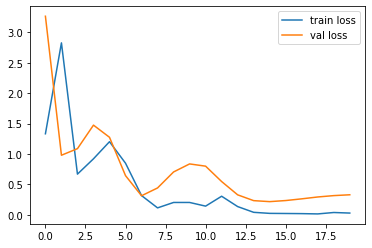

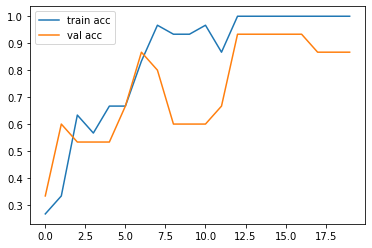

<Figure size 432x288 with 0 Axes>

In [27]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
model.predict(test_set)

array([[9.7613108e-01, 4.3914840e-03, 1.9477407e-02],
       [9.9109590e-01, 2.2330896e-04, 8.6808167e-03],
       [9.8438638e-01, 2.3225778e-04, 1.5381433e-02],
       [9.9911374e-01, 3.3397391e-04, 5.5229728e-04],
       [5.3444034e-01, 2.8076539e-02, 4.3748313e-01],
       [1.5446203e-02, 9.7652900e-01, 8.0248024e-03],
       [9.5299113e-01, 4.2061090e-02, 4.9478780e-03],
       [1.2646254e-02, 9.3970340e-01, 4.7650438e-02],
       [5.3212130e-01, 4.2624471e-01, 4.1634012e-02],
       [2.1144172e-02, 9.6785694e-01, 1.0998882e-02],
       [4.7872007e-02, 8.8115531e-04, 9.5124680e-01],
       [2.4933122e-02, 1.8367934e-03, 9.7323012e-01],
       [9.7874673e-03, 2.1454596e-03, 9.8806703e-01],
       [5.2746558e-03, 6.7110166e-05, 9.9465817e-01],
       [1.4978230e-03, 2.1569144e-03, 9.9634522e-01]], dtype=float32)

In [31]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_set)

In [34]:
 classes=['Dogs', 'Cats','Tigers']

In [40]:
import numpy as np
result=[]
for i in range(len(predictions)):

  maximum = np. where(predictions[i] == np. amax(predictions[i]))
  result.append(maximum)

In [49]:
result

[(array([0]),),
 (array([0]),),
 (array([0]),),
 (array([0]),),
 (array([0]),),
 (array([1]),),
 (array([0]),),
 (array([1]),),
 (array([0]),),
 (array([1]),),
 (array([2]),),
 (array([2]),),
 (array([2]),),
 (array([2]),),
 (array([2]),)]

In [50]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [51]:
img=load_img('/home/test.jpg')

In [53]:
img=img_to_array(img)

In [64]:
img=test_datagen.flow_from_directory('/boot',
                                            target_size = (224, 224),
                                            batch_size = batch,
                                            shuffle=False,
                                            class_mode = 'categorical')

Found 1 images belonging to 2 classes.


In [65]:
probability_model.predict(img)

array([[0.36913198, 0.23268706, 0.39818096]], dtype=float32)